# Introductory examples

## 1.usa.gov data from bit.ly

In [1]:
%pwd

u'/Users/thomas_young/Documents/git_download/pydata-book'

In [2]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
records[0]['tz']

u'America/New_York'

In [7]:
print(records[0]['tz'])

America/New_York


### Counting time zones in pure Python

In [8]:
time_zones = [rec['tz'] for rec in records if ('tz' in rec and rec['tz'])]

In [9]:
from collections import defaultdict
def count_timezone(time_zones):
    count_dict = defaultdict(int)
    for ele in time_zones:
        count_dict[ele] += 1
    return count_dict

In [10]:
count_dict = count_timezone(time_zones=time_zones)

In [29]:
sorted([(key, count) for key, count in count_dict.items()], reverse=True, key=lambda k_v:(k_v[1],k_v[0]))[:10]

[(u'America/New_York', 1251),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33),
 (u'Europe/Berlin', 28)]

In [30]:
from operator import itemgetter
sorted([(key, count) for key, count in count_dict.items()], reverse=True, key=itemgetter(1))[:10]

[(u'America/New_York', 1251),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33),
 (u'Europe/Berlin', 28)]

In [31]:
from collections import Counter
counter = Counter(time_zones)
print(counter.most_common(10))

[(u'America/New_York', 1251), (u'America/Chicago', 400), (u'America/Los_Angeles', 382), (u'America/Denver', 191), (u'Europe/London', 74), (u'Asia/Tokyo', 37), (u'Pacific/Honolulu', 36), (u'Europe/Madrid', 35), (u'America/Sao_Paulo', 33), (u'Europe/Berlin', 28)]


In [32]:
# Counter?

In [33]:
c = Counter('abcdeabcdabcaba')
print(''.join(c.elements()))
print(c.values())

aaaaacccbbbbedd
[5, 3, 4, 1, 2]


### Counting time zones with pandas

In [34]:
%matplotlib inline

In [35]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [36]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [37]:
print(records[:4])

[{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', u'c': u'US', u'nk': 1, u'tz': u'America/New_York', u'gr': u'MA', u'g': u'A6qOVH', u'h': u'wfLQtf', u'cy': u'Danvers', u'l': u'orofrog', u'al': u'en-US,en;q=0.8', u'hh': u'1.usa.gov', u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991', u't': 1331923247, u'hc': 1331822918, u'll': [42.576698, -70.954903]}, {u'a': u'GoogleMaps/RochesterNY', u'c': u'US', u'nk': 0, u'tz': u'America/Denver', u'gr': u'UT', u'g': u'mwszkS', u'h': u'mwszkS', u'cy': u'Provo', u'l': u'bitly', u'hh': u'j.mp', u'r': u'http://www.AwareMap.com/', u'u': u'http://www.monroecounty.gov/etc/911/rss.php', u't': 1331923249, u'hc': 1308262393, u'll': [40.218102, -111.613297]}, {u'a': u'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .N

In [88]:
from pandas import DataFrame, Series
frame = DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [90]:
Series

pandas.core.series.Series

In [39]:
print(frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB
None


In [40]:
frame['tz'].value_counts()[:8]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Name: tz, dtype: int64

In [41]:
np.NAN

nan

In [42]:
np.NAN

nan

In [25]:
clean_tz = frame.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Uknown'
clean_tz.value_counts()[:10]

America/New_York       1251
Uknown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<class 'pandas.core.series.Series'>
0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7               Uknown
8               Uknown
9               Uknown
Name: tz, dtype: object
('tz_count', <class 'pandas.core.series.Series'>)
America/New_York       1251
Uknown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


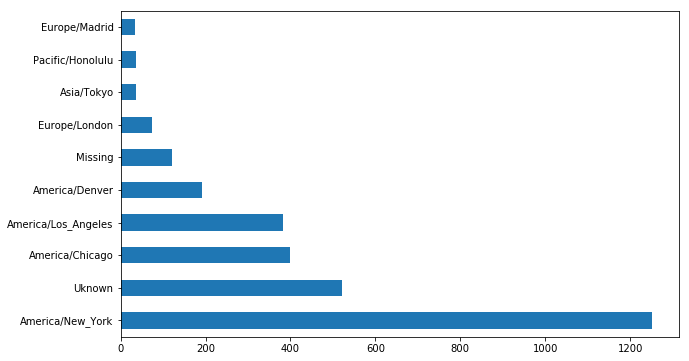

In [144]:
print(type(clean_tz))
print(clean_tz[:10])
tz_counts = clean_tz.value_counts()
print('tz_count', type(tz_counts))
print(tz_counts[:10])
tz_counts[:10].plot(kind='barh', rot=0)

In [27]:
result = Series([x.split()[0] for x in frame.a.dropna()], name='ala')
result[:5]
print(result)

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
13                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17      GoogleMaps/RochesterNY
18                 Mozilla/5.0
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/4.0
22                 Mozilla/5.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
                 ...          
3410               Mozilla/5.0
3411    

In [43]:
result.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
Name: ala, dtype: int64

In [62]:
cframe = frame[frame.a.notnull()]
cframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    0 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 510.6+ KB


In [66]:
operation_system = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
print(type(operation_system))
print(operation_system)
print(operation_system.shape)

<type 'numpy.ndarray'>
['Windows' 'Not Windows' 'Windows' ..., 'Not Windows' 'Not Windows'
 'Windows']
(3440,)


In [67]:
operation_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='|S11')

In [68]:
by_tz_os = cframe.groupby(['tz', operation_system])
print(by_tz_os)
print(type(by_tz_os))

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [79]:
for name,group in by_tz_os:
    print(type(name))
    print(name)
    print(group.info())
    break

<type 'tuple'>
(u'', 'Not Windows')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 8 to 3536
Data columns (total 18 columns):
_heartbeat_    0 non-null float64
a              245 non-null object
al             239 non-null object
c              0 non-null object
cy             0 non-null object
g              245 non-null object
gr             0 non-null object
h              245 non-null object
hc             245 non-null float64
hh             245 non-null object
kw             4 non-null object
l              245 non-null object
ll             0 non-null object
nk             245 non-null float64
r              245 non-null object
t              245 non-null float64
tz             245 non-null object
u              245 non-null object
dtypes: float64(4), object(14)
memory usage: 36.4+ KB
None


In [81]:
print(by_tz_os.size())
print(type(by_tz_os.size()))

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [101]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.info()
agg_counts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries,  to Pacific/Honolulu
Data columns (total 2 columns):
Not Windows    97 non-null float64
Windows        97 non-null float64
dtypes: float64(2)
memory usage: 2.3+ KB


,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [97]:
Series.unstack?

In [106]:
Series.argsort?

In [107]:
agg_counts.sum(1)

tz
                                   521.0
Africa/Cairo                         3.0
Africa/Casablanca                    1.0
Africa/Ceuta                         2.0
Africa/Johannesburg                  1.0
Africa/Lusaka                        1.0
America/Anchorage                    5.0
America/Argentina/Buenos_Aires       1.0
America/Argentina/Cordoba            1.0
America/Argentina/Mendoza            1.0
America/Bogota                       3.0
America/Caracas                      1.0
America/Chicago                    400.0
America/Chihuahua                    2.0
America/Costa_Rica                   1.0
America/Denver                     191.0
America/Edmonton                     6.0
America/Guayaquil                    2.0
America/Halifax                      4.0
America/Indianapolis                20.0
America/La_Paz                       1.0
America/Lima                         1.0
America/Los_Angeles                382.0
America/Managua                      3.0
America/Mazat

In [117]:
indexer = agg_counts.sum(1).argsort()
indexer

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
America/La_Paz                     4
America/Lima                       5
America/Los_Angeles                7
America/Managua                    8
America/Mazatlan                   9
America/Mexico_City               86
America/Monterrey                 1

In [122]:
agg_counts.take([29, 0, 12])

,Not Windows,Windows
tz,,
America/New_York,339.0,912.0
,245.0,276.0
America/Chicago,115.0,285.0


In [138]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [139]:
count_subset.sum(axis=1)

tz
America/Sao_Paulo        33.0
Europe/Madrid            35.0
Pacific/Honolulu         36.0
Asia/Tokyo               37.0
Europe/London            74.0
America/Denver          191.0
America/Los_Angeles     382.0
America/Chicago         400.0
                        521.0
America/New_York       1251.0
dtype: float64

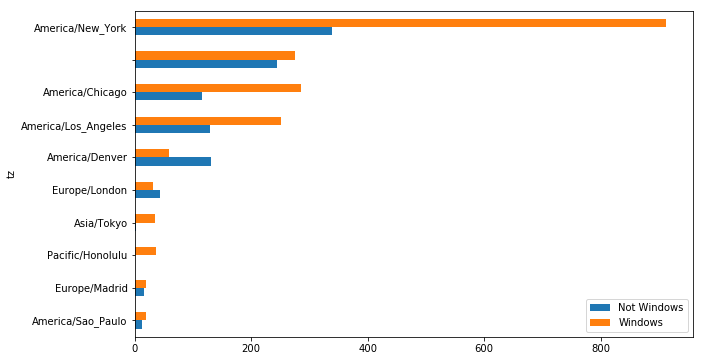

In [148]:
count_subset.plot(kind='barh')

<class 'pandas.core.frame.DataFrame'>


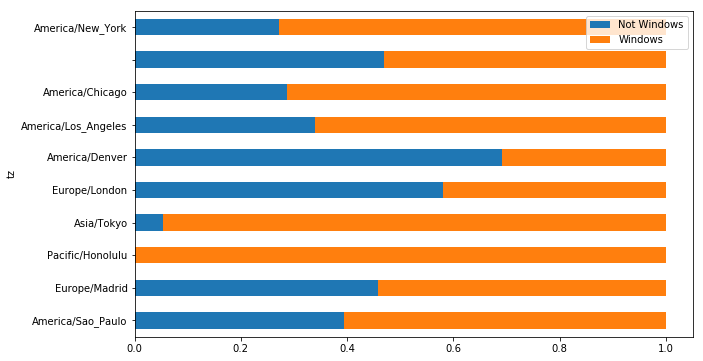

In [145]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
print(type(normed_subset))
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [ ]:
import pandas as pd
import os
encoding = 'latin1'

upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

In [ ]:
users[:5]

In [ ]:
ratings[:5]

In [ ]:
movies[:5]

In [ ]:
ratings

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

In [ ]:
data.ix[0]

In [ ]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

In [ ]:
ratings_by_title = data.groupby('title').size()

In [ ]:
ratings_by_title[:5]

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [ ]:
active_titles[:10]

In [ ]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [ ]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

### Measuring rating disagreement

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [ ]:
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

In [ ]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

In [ ]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# Order Series by value in descending order
rating_std_by_title.order(ascending=False)[:10]

### US Baby Names 1880-2010

In [ ]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

http://www.ssa.gov/oact/babynames/limits.html

In [ ]:
!head -n 10 ch02/names/yob1880.txt

In [ ]:
import pandas as pd
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

In [ ]:
names1880.groupby('sex').births.sum()

In [ ]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [ ]:
total_births.tail()

In [ ]:
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [ ]:
names

In [ ]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

In [ ]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [ ]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [ ]:
top1000.index = np.arange(len(top1000))

In [ ]:
top1000

### Analyzing naming trends

In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

In [ ]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [ ]:
plt.figure()

In [ ]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]
df

In [ ]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

In [ ]:
prop_cumsum.values.searchsorted(0.5)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

In [ ]:
diversity.plot(title="Number of popular names in top 50%")

#### The "Last letter" Revolution

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()


In [ ]:
subtable.sum()

In [ ]:
letter_prop = subtable / subtable.sum().astype(float)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
plt.close('all')

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [ ]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
plt.close('all')

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})